In [23]:
import random
import gym
from IPython import display
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
%matplotlib inline
env = gym.make("Taxi-v2")

/home/mds/anaconda3/envs/pytorch_study/lib/python3.8/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment Taxi-v2 is out of date. You should consider upgrading to version `v3`.
  logger.warn(


DeprecatedEnv: Environment version v2 for `Taxi` is deprecated. Please use `Taxi-v3` instead.

In [22]:
env.s = 328
env.render()
print(env.step(2))
time.sleep(10)
clear_output(wait=True)
env.render()

AssertionError: Something went wrong with pygame. This should never happen.

In [23]:
import gym
import time
from IPython.display import clear_output

env = gym.make("Taxi-v3").env

# for i in range(0,100):
#     clear_output(wait=True)
#     env.reset()
#     env.render()
#     time.sleep(0.5)

In [24]:
env.s = 328
env.render()
print(env.step(2))
time.sleep(10)
clear_output(wait=True)
env.render()

ResetNeeded: Cannot call `env.render()` before calling `env.reset()`, if this is a intended action, set `disable_render_order_enforcing=True` on the OrderEnforcer wrapper.

In [25]:
import numpy as np
import gym
import random

# create Taxi environment
env = gym.make('Taxi-v3')


In [26]:
# create a new instance of taxi, and get the initial state
state = env.reset()

In [28]:
import gym
import numpy as np
import random

# create Taxi environment
env = gym.make('Taxi-v3', render_mode='human')



# create a new instance of taxi, and get the initial state
state = env.reset()

num_steps = 99
for s in range(num_steps+1):
    print(f"step: {s} out of {num_steps}")

    # sample a random action from the list of available actions
    action = env.action_space.sample()

    # perform this action on the environment
    env.step(action)

    # print the new state
    env.render()

# end this instance of the taxi environment
env.close()

step: 0 out of 99


/home/mds/anaconda3/envs/pytorch_study/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


step: 1 out of 99
step: 2 out of 99
step: 3 out of 99
step: 4 out of 99
step: 5 out of 99
step: 6 out of 99
step: 7 out of 99
step: 8 out of 99
step: 9 out of 99
step: 10 out of 99
step: 11 out of 99
step: 12 out of 99
step: 13 out of 99
step: 14 out of 99
step: 15 out of 99
step: 16 out of 99
step: 17 out of 99
step: 18 out of 99
step: 19 out of 99
step: 20 out of 99
step: 21 out of 99
step: 22 out of 99
step: 23 out of 99
step: 24 out of 99
step: 25 out of 99
step: 26 out of 99
step: 27 out of 99
step: 28 out of 99
step: 29 out of 99
step: 30 out of 99
step: 31 out of 99
step: 32 out of 99
step: 33 out of 99
step: 34 out of 99
step: 35 out of 99
step: 36 out of 99
step: 37 out of 99
step: 38 out of 99
step: 39 out of 99
step: 40 out of 99
step: 41 out of 99
step: 42 out of 99
step: 43 out of 99
step: 44 out of 99
step: 45 out of 99
step: 46 out of 99
step: 47 out of 99
step: 48 out of 99
step: 49 out of 99
step: 50 out of 99
step: 51 out of 99
step: 52 out of 99
step: 53 out of 99
st

In [1]:
import random
import gym
from IPython import display
import time
import matplotlib.pyplot as pyplot
import numpy as np
from IPython.display import clear_output
%matplotlib inline
env = gym.make("Taxi-v3").env

In [2]:
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0


In [3]:
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    
    qa = max([[q(nextstate, a)] for a in range (env.action_space.n)] )
    q[(prev_state,action)] += alpha * (reward + gamma*qa - q[(prev_state, action)])
    

In [4]:
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q[state,:])
        # return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)] )
        

In [5]:
alpha =0.4
gamma = 0.999
epsilon = 0.017

In [6]:
state = env.reset()
action = epsilon_greedy_policy(state, epsilon)
print(action)

TypeError: unhashable type: 'dict'

In [ ]:
for i in range(1):
    r = 0
    state = env.reset()
    
    while True:
        action = epsilon_greedy_policy(state, epsilon)
        
        nextstate, reward, done, _ = env.step(action)
        
        update_q_table(state, action, reward, nextstate, alpha, gamma)
        
        state = nextstate
        
        r += reward
        
        if done:
            break
    print('total reward: ',r)
env.close()

TypeError: unhashable type: 'dict'

In [84]:
import numpy as np
import gym
import random

# create Taxi environment
env = gym.make('Taxi-v3')


In [85]:
# create a new instance of taxi, and get the initial state
state = env.reset()

In [88]:
state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

In [89]:
# hyperparameters to tune
learning_rate = 0.9
discount_rate = 0.8

# Qlearning algorithm: Q(s,a) := Q(s,a) + learning_rate * (reward + discount_rate * max Q(s',a') - Q(s,a))
qtable[state, action] += learning_rate * (reward + discount_rate * np.max(qtable[new_state,:]) - qtable[state,action])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [9]:
import random
import gym
from IPython import display
import time
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
%matplotlib inline
env = gym.make("Taxi-v3").env

In [10]:
Q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        Q[(s,a)] = 0.0

In [18]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return max(range(env.action_space.n), key=lambda x: Q[(state, x)])


In [19]:
# def epsilon_greedy(state, epsilon):
#     if random.uniform(0,1) <epsilon:
#         return env.action_space.sample()
#     else:
#         return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

In [20]:
alpha = 0.4
gamma = 0.999
epsilon = 0.017

In [28]:
for i in range(4000):
    r = 0
    
    state = env.reset()
    
    action = epsilon_greedy(state,epsilon)
    
    while True:
        nextstate, reward, truncated,done, _ = env.step(action)
        
        nextaction= epsilon_greedy(nextstate,epsilon)
        
        Q[(state,action)] += alpha * (reward + gamma * Q[(nextstate,nextaction)] - Q[(state,action)])
        
        action = nextaction
        state = nextstate
        r += reward
        
        if done:
            break
    print('total reward: ',r)
env.close()

TypeError: unhashable type: 'dict'

In [32]:
import numpy as np
import gym
import random

def main():

    # create Taxi environment
    env = gym.make('Taxi-v3')

    # initialize q-table
    state_size = env.observation_space.n
    action_size = env.action_space.n
    qtable = np.zeros((state_size, action_size))

    # hyperparameters
    learning_rate = 0.9
    discount_rate = 0.8
    epsilon = 1.0
    decay_rate= 0.005

    # training variables
    num_episodes = 1000
    max_steps = 99 # per episode

    # training
    for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        for s in range(max_steps):

            # exploration-exploitation tradeoff
            if random.uniform(0,1) < epsilon:
                # explore
                action = env.action_space.sample()
            else:
                # exploit
                action = np.argmax(qtable[state,:])

            # take action and observe reward
            new_state, reward ,done,truncated,info = env.step(action)

            # Q-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

            # Update to our new state
            state = new_state

            # if done, finish episode
            if done == True:
                break

        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

    print(f"Training completed over {num_episodes} episodes")
    input("Press Enter to watch trained agent...")

    # watch trained agent
    state = env.reset()
    done = False
    rewards = 0

    for s in range(max_steps):

        print(f"TRAINED AGENT")
        print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, truncated, info = env.step(action)
        rewards += reward
        env.render()
        print(f"score: {rewards}")
        state = new_state

        if done == True:
            break

    env.close()

if __name__ == "__main__":
    main()


/home/mds/anaconda3/envs/pytorch_study/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [6]:
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()

In [33]:
import gym
import numpy
import random
from os import system, name
from time import sleep

# Define function to clear console window.
def clear(): 
  
    # Clear on Windows.
    if name == 'nt': 
        _ = system('cls')
  
    # Clear on Mac and Linux. (os.name is 'posix') 
    else: 
        _ = system('clear')

clear()

"""Setup"""

env = gym.make("Taxi-v3").env # Setup the Gym Environment

# Make a new matrix filled with zeros.
# The matrix will be 500x6 as there are 500 states and 6 actions.
q_table = numpy.zeros([env.observation_space.n, env.action_space.n])

training_episodes = 20000 # Amount of times to run environment while training.
display_episodes = 10 # Amount of times to run environment after training.

# Hyperparameters
alpha = 0.1 # Learning Rate
gamma = 0.6 # Discount Rate
epsilon = 0.1 # Chance of selecting a random action instead of maximising reward.

# For plotting metrics
all_epochs = []
all_penalties = []

"""Training the Agent"""

for i in range(training_episodes):
    state = env.reset()[0] # Reset returns observation state and other info. We only need the state.
    done = False
    penalties, reward, = 0, 0
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Pick a new action for this state.
        else:
            action = numpy.argmax(q_table[state]) # Pick the action which has previously given the highest reward.

        next_state, reward, done, truncated, info = env.step(action) 
        
        old_value = q_table[state, action] # Retrieve old value from the q-table.
        next_max = numpy.max(q_table[next_state])

        # Update q-value for current state.
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10: # Checks if agent attempted to do an illegal action.
            penalties += 1

        state = next_state
        
    if i % 100 == 0: # Output number of completed episodes every 100 episodes.
        print(f"Episode: {i}")

print("Training finished.\n")

"""Display and evaluate agent's performance after Q-learning."""

total_epochs, total_penalties = 0, 0

for _ in range(display_episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = numpy.argmax(q_table[state])
        state, reward, done, truncated,info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1
        clear()
        env.render()
        print(f"Timestep: {epochs}")
        print(f"State: {state}")
        print(f"Action: {action}")
        print(f"Reward: {reward}")
        sleep(0.15) # Sleep so the user can see the 

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {display_episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / display_episodes}")
print(f"Average penalties per episode: {total_penalties / display_episodes}")

Episode: 0
Episode: 100
Episode: 200
Episode: 300
Episode: 400
Episode: 500
Episode: 600
Episode: 700
Episode: 800
Episode: 900
Episode: 1000
Episode: 1100
Episode: 1200
Episode: 1300
Episode: 1400
Episode: 1500
Episode: 1600
Episode: 1700
Episode: 1800
Episode: 1900
Episode: 2000
Episode: 2100
Episode: 2200
Episode: 2300
Episode: 2400
Episode: 2500
Episode: 2600
Episode: 2700
Episode: 2800
Episode: 2900
Episode: 3000
Episode: 3100
Episode: 3200
Episode: 3300
Episode: 3400
Episode: 3500
Episode: 3600
Episode: 3700
Episode: 3800
Episode: 3900
Episode: 4000
Episode: 4100
Episode: 4200
Episode: 4300
Episode: 4400
Episode: 4500
Episode: 4600
Episode: 4700
Episode: 4800
Episode: 4900
Episode: 5000
Episode: 5100
Episode: 5200
Episode: 5300
Episode: 5400
Episode: 5500
Episode: 5600
Episode: 5700
Episode: 5800
Episode: 5900
Episode: 6000
Episode: 6100
Episode: 6200
Episode: 6300
Episode: 6400
Episode: 6500
Episode: 6600
Episode: 6700
Episode: 6800
Episode: 6900
Episode: 7000
Episode: 7100
Epis

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [34]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
from time import sleep
import warnings

warnings.filterwarnings("ignore")

In [35]:
def run_animation(experience_buffer):
    time_lag = 0.05  # Delay (in s) between frames
    for experience in experience_buffer:
        # Plot frame
        clear_output(wait=True)
        plt.imshow(experience['frame'])
        plt.axis('off')
        plt.show()

        print(f"Episode: {experience['episode']}/{experience_buffer[-1]['episode']}")
        print(f"Epoch: {experience['epoch']}/{experience_buffer[-1]['epoch']}")
        print(f"State: {experience['state']}")
        print(f"Action: {experience['action']}")
        print(f"Reward: {experience['reward']}")

        # Pause animation
        sleep(time_lag)

State space: Discrete(500)
Action space: Discrete(6)
State: 92
Action: 0
Action mask: [1 0 0 1 0 0]
Reward: -1


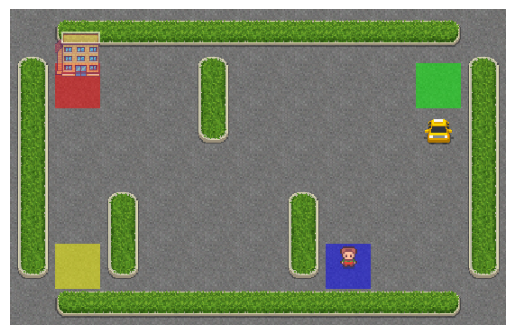

In [36]:
# Initialize and validate the environment
env = gym.make("Taxi-v3", render_mode="rgb_array").env
state, _ = env.reset()

# Print dimensions of state and action space
print(f"State space: {env.observation_space}")
print(f"Action space: {env.action_space}")

# Sample random action
action = env.action_space.sample(env.action_mask(state))
next_state, reward, done, _, _ = env.step(action)

print(f"State: {state}")
print(f"Action: {action}")
print(f"Action mask: {env.action_mask(state)}")
print(f"Reward: {reward}")

# Render and plot an environment frame
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

In [37]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 1.0  # Discount rate
epsilon = 0.1  # Exploration rate
num_episodes = 10000  # Number of episodes

cum_rewards = np.zeros([num_episodes])
total_epochs = np.zeros([num_episodes])

for episode in range(1, num_episodes+1):
    state, info = env.reset()
    epoch = 0
    num_failed_dropoffs = 0
    done = False
    cum_reward = 0

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample(env.action_mask(state)) # "Explore action space with action mask"
        else:
            action_mask = np.where(info["action_mask"]==1,0,1) # invert
            masked_q_values = np.ma.array(q_table[state], mask=action_mask, dtype=np.float32)
            action = np.ma.argmax(masked_q_values, axis=0) # "Exploit learned values with action mask"
        
        next_state, reward, done, _ , info = env.step(action)

        cum_reward += reward

        old_q_value = q_table[state, action]
        next_max = np.max(q_table[next_state])

        new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)

        q_table[state, action] = new_q_value

        if reward == -10:
            num_failed_dropoffs += 1

        state = next_state
        epoch += 1

        total_epochs[episode-1] = epoch
        cum_rewards[episode-1] = cum_reward

    if episode % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {episode}")

print("Training completed.")

Episode: 10000
Training completed.


In [38]:
num_epochs = 0
total_failed_deliveries = 0
num_episodes = 20
experience_buffer = []
total_penalties = 0

for episode in range(1, num_episodes + 1):
    # Initialize experience buffer
    my_env = env.reset()
    state = my_env[0]
    epoch = 1 
    num_failed_deliveries =0
    cum_reward = 0
    done = False
    num_of_penalty = 0

    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, _, _ = env.step(action)
        cum_reward += reward
        
        if reward <= 0:
            num_of_penalty += 1

        if reward == -10:
            num_failed_deliveries += 1

        # Store rendered frame in animation dictionary
        experience_buffer.append({
            'frame': env.render(),
            'episode': episode,
            'epoch': epoch,
            'state': state,
            'action': action,
            'reward': cum_reward
            }
        )

        epoch += 1

    total_failed_deliveries += num_failed_deliveries
    num_epochs += epoch
    total_penalties += num_of_penalty

# Run animation and print output
# run_animation(experience_buffer)

print(f"Test results after {num_episodes} episodes and epsilon = {epsilon}:\n")
print(f"Mean epochs per episode: {num_epochs / num_episodes}")
print(f"Mean failed drop-offs per episode: {total_failed_deliveries / num_episodes}")
print(f"Mean number of penalties per episode: {total_penalties / num_episodes}")


Test results after 20 episodes and epsilon = 0.1:

Mean epochs per episode: 14.8
Mean failed drop-offs per episode: 0.0
Mean number of penalties per episode: 12.8


In [42]:
state = env.reset()
total_reward=0
while True:
    action = np.argmax(q_table[state])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    env.render()
    state, reward, done, _, _ = env.step(action)
    total_reward += reward
    print('Episode Reward= ',total_reward)
    time.sleep(0.5)
    
    if done:
        break
env.close()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

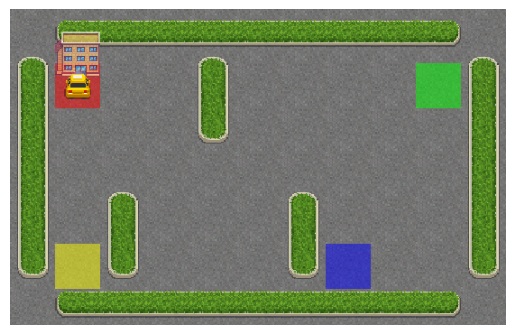

Episode: 20/20
Epoch: 13/13
State: 0
Action: 5
Reward: 8


In [43]:
run_animation(experience_buffer)